In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import imutils

In [2]:
def perspective(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    con_sq = contours[0].squeeze()
    con_trans = con_sq.transpose()
    temp_rect = np.zeros((4,2), dtype = "float32")
    temp_rect[0] = con_sq[con_trans[1].argmin()]
    temp_rect[1] = con_sq[con_trans[0].argmax()]
    temp_rect[2] = con_sq[con_trans[1].argmax()]
    temp_rect[3] = con_sq[con_trans[0].argmin()] # temp_rect에 좌상, 우상, 우하, 좌하 순서로 담김
    
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    
    # plt imshow로 그림그려줌
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(warp,cmap='gray')
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

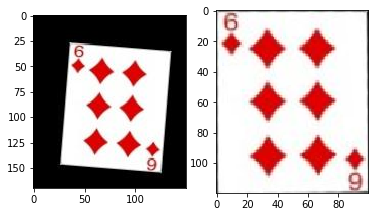

In [3]:
warp_img, rect = perspective('../big_au/sample1/D6_0_7081.jpg')

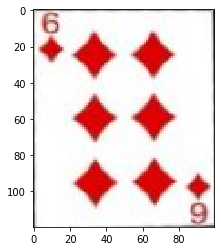

In [4]:
plt.imshow(warp_img)
plt.show()

In [34]:
def perspective2(file_name):
    ## contours를 찾는 작업
    tresh_min = 100
    tresh_max = 255
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # 모서리를 찾는 작업
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = img.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)
        
        
    temp_rect = np.zeros((4,2), dtype = "float32")
    temp_rect[0] = box[box[:,1].argmin()]
    temp_rect[1] = box[box[:,0].argmax()]
    temp_rect[2] = box[box[:,1].argmax()]
    temp_rect[3] = box[box[:,0].argmin()]
   
    """ 
    temp_rect = np.zeros((4,2), dtype = "float32")
    temp_rect[0] = box[box[:,1].argmin()]
    temp_rect[1] = box[con_trans[0].argmax()]
    temp_rect[2] = con_sq[box[:,1].argmax()]
    temp_rect[3] = con_sq[con_trans[0].argmin()]"""

    #srcPoint=np.array([box[1],box[2],box[3],box[0]],dtype=np.float32)
    
    print(rects)
    print(box)
    # wrapPerspective 하는 작업
    maxWidth = 100
    maxHeight = 120
    dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
    M = cv2.getPerspectiveTransform(temp_rect,dst)
    warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김
    
    # plt imshow로 그림그려줌
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(warp,cmap='gray')
    
    # wrap 이미지랑 꼭지점 담긴 행렬 돌려줌
    return warp, temp_rect

[((80.38871002197266, 90.39112091064453), (119.93681335449219, 100.0403823852539), -85.42607879638672)]
[[125 154]
 [ 25 146]
 [ 35  26]
 [135  34]]


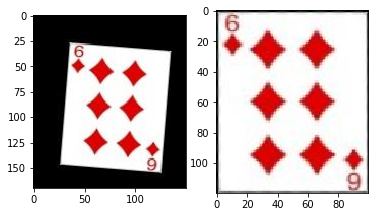

In [35]:
warp_img, rect = perspective2('../big_au/sample1/D6_0_7081.jpg')

[((208.9223175048828, 127.96717071533203), (212.60614013671875, 255.12734985351562), -10.784297943115234)]
[[128 273]
 [ 80  22]
 [289 -17]
 [337 233]]


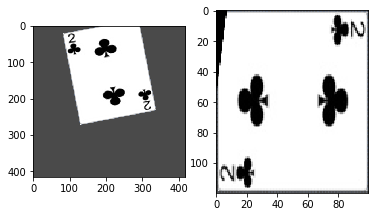

In [36]:
warp_img, rect = perspective2('test.png')

In [30]:
box

array([[128, 272],
       [ 81,  22],
       [289, -16],
       [336, 232]])

In [29]:
box[:,1]

array([272,  22, -16, 232])

In [5]:
rect

array([[ 36.,  27.],
       [135.,  35.],
       [124., 154.],
       [ 26., 144.]], dtype=float32)

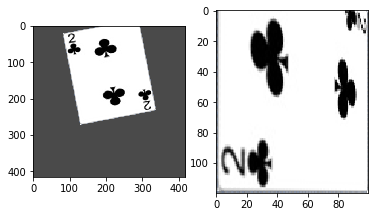

In [7]:
warp_img, rect = perspective('test.png')

In [9]:
file_name = 'test.png'

In [12]:
## contours를 찾는 작업
tresh_min = 100
tresh_max = 255
image = cv2.imread(file_name)
im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 모서리를 찾는 작업
con_sq = contours[0].squeeze()
con_trans = con_sq.transpose()
temp_rect = np.zeros((4,2), dtype = "float32")
temp_rect[0] = con_sq[con_trans[1].argmin()]
temp_rect[1] = con_sq[con_trans[0].argmax()]
temp_rect[2] = con_sq[con_trans[1].argmax()]
temp_rect[3] = con_sq[con_trans[0].argmin()] # temp_rect에 좌상, 우상, 우하, 좌하 순서로 담김

In [31]:
temp_rect = np.zeros((4,2), dtype = "float32")
temp_rect[0] = box[box[:,1].argmin()]
temp_rect[1] = box[box[:,0].argmax()]
temp_rect[2] = box[box[:,1].argmax()]
temp_rect[3] = box[box[:,0].argmin()]

In [32]:
temp_rect

array([[289., -16.],
       [336., 232.],
       [128., 272.],
       [ 81.,  22.]], dtype=float32)

In [33]:
box

array([[128, 272],
       [ 81,  22],
       [289, -16],
       [336, 232]])

In [ ]:
# 모서리를 찾는 작업
con_sq = contours[0].squeeze()
con_trans = con_sq.transpose()
temp_rect = np.zeros((4,2), dtype = "float32")
temp_rect[0] = con_sq[con_trans[1].argmin()]
temp_rect[1] = con_sq[con_trans[0].argmax()]
temp_rect[2] = con_sq[con_trans[1].argmax()]
temp_rect[3] = con_sq[con_trans[0].argmin()] # temp_rect에 좌상, 우상, 우하, 좌하 순서로 담김

# wrapPerspective 하는 작업
maxWidth = 100
maxHeight = 120
dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
M = cv2.getPerspectiveTransform(temp_rect,dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight)) # warp에 이미지 담김

# plt imshow로 그림그려줌
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
warp = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(warp,cmap='gray')


In [4]:
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
thresh, im_bw = cv2.threshold(img, 170, 255, 0)
contours, hierarchy = cv2.findContours(im_bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.minAreaRect(each) for each in contours]
rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
img2 = img.copy()
for rect in rects:
    box = cv2.boxPoints(rect)
    box = box.astype('int')
    img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)

In [9]:
box

array([[128, 272],
       [ 81,  22],
       [289, -16],
       [336, 232]])

In [11]:
rects

[((209.00985717773438, 127.92670440673828),
  (211.2963409423828, 253.95791625976562),
  -10.784297943115234)]

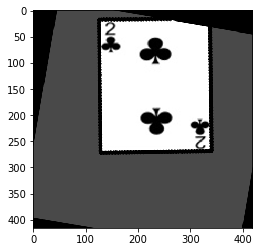

In [10]:
rotated = imutils.rotate(img2,-10, center=(128,272))
plt.imshow(rotated, cmap = 'gray')

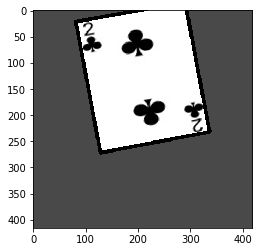

In [24]:
plt.imshow(img2, cmap = 'gray')

In [29]:
((img2.shape)[1]/2,(img2.shape)[0]/2)

(209.5, 208.0)

In [34]:
M=cv2.getRotationMatrix2D(((img2.shape)[1]/2,(img2.shape)[0]/2),rects[0][2],1)
dst=cv2.warpAffine(img2,M,(img2.shape[1],img.shape[0]))

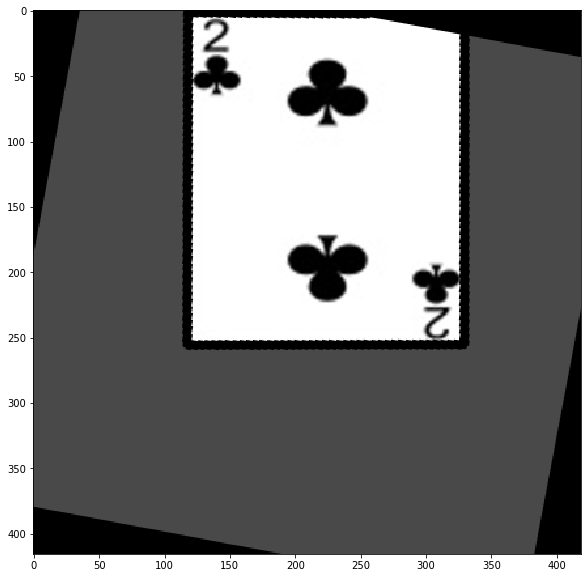

In [35]:
plt.figure(figsize=(20,10))
plt.imshow(dst, cmap = 'gray')

In [38]:
((img2.shape)[1]/2,(img2.shape)[0]/2)

(209.5, 208.0)

In [54]:
box

array([[128, 272],
       [ 81,  22],
       [289, -16],
       [336, 232]])

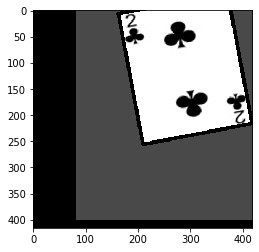

In [67]:
height, width = img2.shape[:2]
M = np.float32([[1, 0, 81], [0, 1, -16]]) # 이미지를 오른쪽으로 100, 아래로 25 이동시킵니다.
img_translation = cv2.warpAffine(img2, M, (width,height))
plt.imshow(img_translation, cmap = 'gray')

In [70]:
M=cv2.getRotationMatrix2D((81,-16),rects[0][2],1)
dst=cv2.warpAffine(img2,M,(img2.shape[1],img.shape[0]))

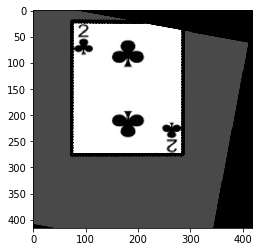

In [72]:
plt.imshow(dst, cmap = 'gray')

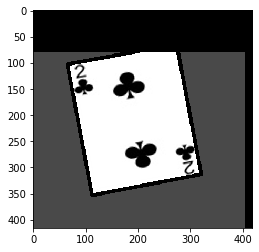

In [69]:
height, width = img2.shape[:2]
M = np.float32([[1, 0, -16], [0, 1, 81]]) # 이미지를 오른쪽으로 100, 아래로 25 이동시킵니다.
img_translation = cv2.warpAffine(img2, M, (width,height))
plt.imshow(img_translation, cmap = 'gray')

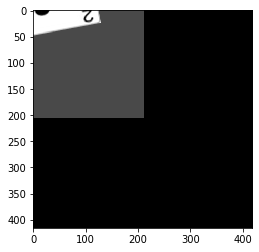

In [51]:
height, width = img.shape[:2]
M = np.float32([[1, 0, -(img.shape)[0]/2], [0, 1, -(img.shape)[1]/2]]) # 이미지를 오른쪽으로 100, 아래로 25 이동시킵니다.
img_translation = cv2.warpAffine(img, M, (width,height))
plt.imshow(img_translation, cmap = 'gray')

In [18]:
def PerspectiveTransform(file_name):
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    thresh, im_bw = cv2.threshold(img, 170, 255, 0)
    contours, hierarchy = cv2.findContours(im_bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.minAreaRect(each) for each in contours]
    rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>9000))]
    img2 = img.copy()
    for rect in rects:
        box = cv2.boxPoints(rect)
        box = box.astype('int')
        img2 = cv2.drawContours(img2, [box], -1, (0, 0, 255), 5)

    srcPoint=np.array([box[1],box[2],box[3],box[0]],dtype=np.float32)
    dstPoint=np.array([[0, 0], [100, 0], [100, 120], [0, 120]], dtype=np.float32)
    matrix = cv2.getPerspectiveTransform(srcPoint, dstPoint )
    dst = cv2.warpPerspective(img, matrix, (100, 120))
    
    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(dst,cmap='gray')
    

In [ ]:
PerspectiveTransform

In [13]:
srcPoint=np.array([box[1],box[2],box[3],box[0]],dtype=np.float32)

In [14]:
dstPoint=np.array([[0, 0], [100, 0], [100, 120], [0, 120]], dtype=np.float32)

In [15]:
matrix = cv2.getPerspectiveTransform(srcPoint, dstPoint )

In [16]:
dst = cv2.warpPerspective(img, matrix, (100, 120))

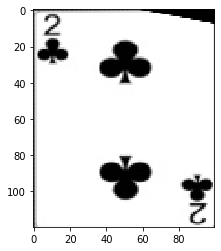

In [17]:
plt.imshow(dst,cmap = 'gray' )